In [1]:
# TweetTokenize
# Pull out the hashtag
# Lemmatize the tokenized words
# Put it back in a sentence " ".join(tokenized_words)
# Run through Spacy to find closest related words
# Re-tokenize for Machine Learning
# Profit

In [2]:
### handle links?  after splitting words, if contains http, remove
### #hashtag_words look like they're valuable - done

### visualizations - word clouds by target?
### Lemmatize - removed past tense?
### If word contains unknown characters, remove?
### Lower case characters
### %20 is a space
### remove extra letters from keywords to extract the keywords - wildfires > fire

In [3]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk, spacy, re, string, unicodedata, contractions
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
# nltk.download
# nltk.download('wordnet')
# nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer

import preprocessor as p

In [5]:
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
clean_df = pd.read_csv('final_clean_text.csv')

In [7]:
clean_df

,keyword,location,text,target,hashtag,mentions
0,NaN,NaN,reason,1,['earthquake'],[]
1,NaN,NaN,forest fire near la canada,1,[],[]
2,NaN,NaN,resident ask shelter place officer evacuation ...,1,[],[]
3,NaN,NaN,people evacuation order california,1,['wildfires'],[]
4,NaN,NaN,get send photo smoke school,1,"['Alaska', 'wildfires']",[]
...,...,...,...,...,...,...
7608,NaN,NaN,giant crane hold bridge collapse nearby home,1,[],[]
7609,NaN,NaN,control wild fire california northern state,1,[],"['aria_ahrary', 'TheTawniest']"
7610,NaN,NaN,m utc km s volcano hawaii,1,[],[]
7611,NaN,NaN,police investigate e bike collide car little e...,1,[],[]


In [8]:
clean_df.head()

,keyword,location,text,target,hashtag,mentions
0,NaN,NaN,reason,1,['earthquake'],[]
1,NaN,NaN,forest fire near la canada,1,[],[]
2,NaN,NaN,resident ask shelter place officer evacuation ...,1,[],[]
3,NaN,NaN,people evacuation order california,1,['wildfires'],[]
4,NaN,NaN,get send photo smoke school,1,"['Alaska', 'wildfires']",[]


In [108]:
counter = CountVectorizer()

In [109]:
clean_df.text.isna().value_counts()

False    7562
True       51
Name: text, dtype: int64

In [110]:
removed_na = clean_df.dropna(axis=0,subset=['text'])

In [145]:
def word_clouder(data):
    text = " ".join(i for i in data.text)
    wordcloud = WordCloud(background_color="black").generate(text)
    return wordcloud

In [146]:
disaster_cloud = word_clouder(removed_na.loc[removed_na['target']==1])
non_disaster_cloud = word_clouder(removed_na.loc[removed_na['target']==0])

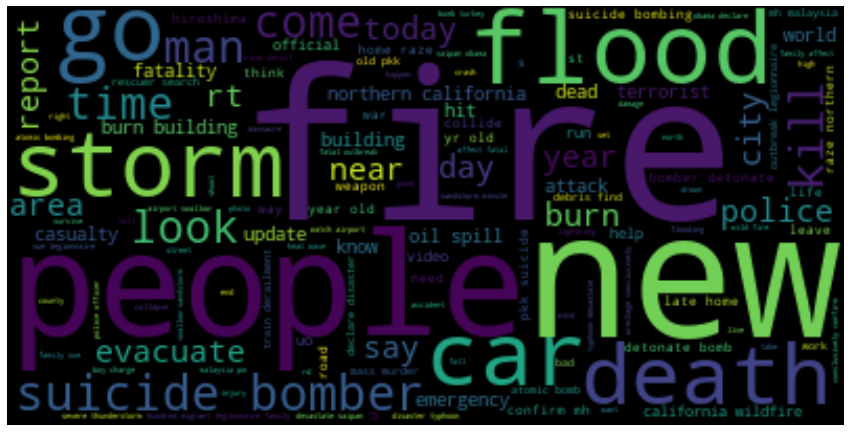

In [147]:
plt.figure( figsize=(15,10))
plt.imshow(disaster_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

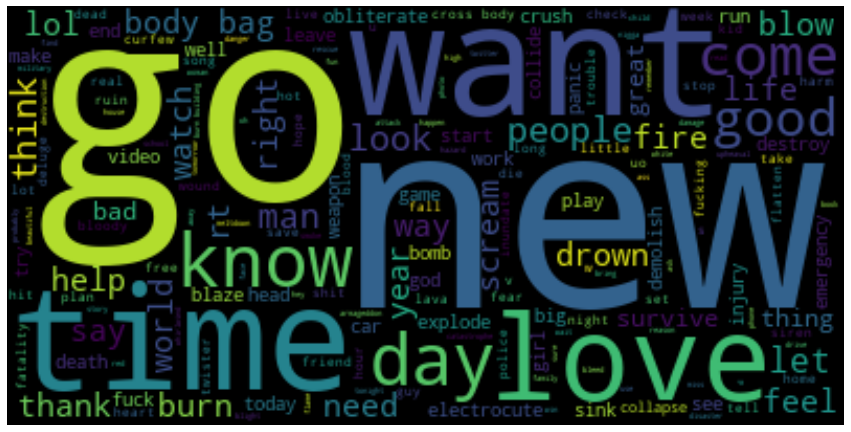

In [148]:
plt.figure( figsize=(15,10))
plt.imshow(non_disaster_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
model = LogisticRegression()

,word,count
1330,zone,1871
279,zombie,1870
665,yrs,1869
656,yr,1868
1755,youuave,1867
...,...,...
117,able,4
61,ablaze,3
1134,abc,2
1421,abandon,1


In [175]:
all_df['target'] = removed_na['target']

In [176]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(all_df,removed_na['target'],test_size = .2, random_state = 42)

In [191]:
model.fit(X_train,y_train)

LogisticRegression()

In [192]:
y_preds = model.predict(X_test)

In [193]:
model.score(X_test,y_test)

0.7931262392597488

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [196]:
rf.score(X_test,y_test)

0.7587574355584931

In [199]:
importance = rf.feature_importances_

In [200]:
words = X_train.columns

In [201]:
features = pd.DataFrame(words)

In [203]:
features['importance'] = importance

In [205]:
features.columns = ['word','importance']

In [208]:
features.sort_values(by='importance',ascending = False,inplace = True)

In [211]:
from sklearn.metrics import classification_report

In [213]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3454
           1       0.91      0.79      0.84      2595

    accuracy                           0.87      6049
   macro avg       0.88      0.86      0.87      6049
weighted avg       0.88      0.87      0.87      6049



In [214]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       857
           1       0.80      0.69      0.74       656

    accuracy                           0.79      1513
   macro avg       0.80      0.78      0.79      1513
weighted avg       0.79      0.79      0.79      1513



In [215]:
print(classification_report(y_train,rf.predict(X_train)))
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3454
           1       0.98      0.96      0.97      2595

    accuracy                           0.98      6049
   macro avg       0.98      0.98      0.98      6049
weighted avg       0.98      0.98      0.98      6049

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       857
           1       0.74      0.68      0.71       656

    accuracy                           0.76      1513
   macro avg       0.76      0.75      0.75      1513
weighted avg       0.76      0.76      0.76      1513



In [210]:
features.tail(50)

,word,importance
1782,talking,3.426029e-06
175,blackberry,3.147235e-06
1304,peanut,3.135238e-06
1346,plug,2.933871e-06
1325,piling,2.646377e-06
1081,marry,2.569996e-06
428,data,2.548877e-06
179,blazing,2.360161e-06
993,leaving,2.285528e-06
1083,maryland,2.266819e-06


In [160]:
y_test

5944    0.0
1129    0.0
6013    1.0
4204    0.0
5792    0.0
       ... 
7204    0.0
5636    0.0
6615    0.0
5826    1.0
7084    0.0
Name: target, Length: 1513, dtype: float64

In [184]:
all_words_matrix = counter.fit_transform(removed_na.text)

In [185]:
all_words_array = all_words_matrix.toarray()

In [186]:
all_words_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [187]:
all_df = pd.DataFrame(data=all_words_array, columns = counter.get_feature_names())

In [125]:
word_count = pd.DataFrame(data = all_df.sum())

In [128]:
word_count = word_count.reset_index()

In [129]:
word_count.columns = ['word','count']

In [130]:
word_count.head()

,word,count
0,aba,14
1,abandon,9
2,abc,22
3,ablaze,27
4,able,10


In [131]:
word_count.sort_values(by = 'count', ascending = False, inplace= True)

In [132]:
word_count.head()

,word,count
1011,like,391
658,fire,353
1210,new,230
740,go,225
1305,people,212


In [ ]:
wordcloud=WordCloud(width = 2000, height = 1500).generate_from_frequencies(counter.vocabulary_)

In [135]:
text = " ".join(i for i in removed_na.text)

In [139]:
wordcloud = WordCloud(background_color="black").generate(text)

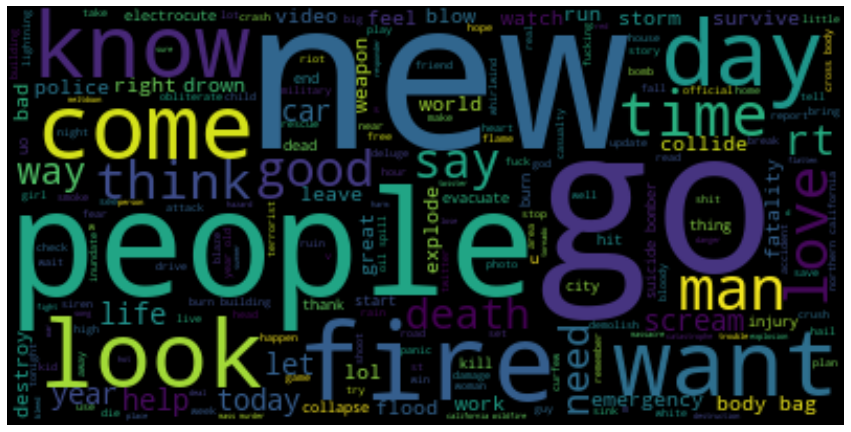

In [140]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
counter.vocabulary_

{'reason': 1450,
 'forest': 684,
 'fire': 658,
 'near': 1204,
 'la': 967,
 'canada': 263,
 'resident': 1488,
 'ask': 103,
 'shelter': 1615,
 'place': 1331,
 'officer': 1240,
 'evacuation': 579,
 'order': 1261,
 'expect': 592,
 'people': 1305,
 'california': 253,
 'get': 730,
 'send': 1590,
 'photo': 1318,
 'smoke': 1661,
 'school': 1570,
 'update': 1925,
 'hwy': 863,
 'closed': 330,
 'lake': 972,
 'county': 382,
 'heavy': 801,
 'rain': 1428,
 'cause': 284,
 'flash': 664,
 'flooding': 671,
 'street': 1731,
 'colorado': 345,
 'spring': 1694,
 'area': 91,
 'hill': 818,
 'emergency': 553,
 'happen': 780,
 'building': 236,
 'afraid': 33,
 'tornado': 1842,
 'come': 349,
 'die': 480,
 'heat': 799,
 'wave': 1979,
 'far': 625,
 'haha': 773,
 'south': 1678,
 'wait': 1962,
 'second': 1582,
 'live': 1023,
 'go': 740,
 'day': 433,
 'lose': 1038,
 'myanmar': 1190,
 'arrive': 96,
 'damage': 419,
 'bus': 241,
 'car': 270,
 'crash': 393,
 'man': 1067,
 'love': 1043,
 'summer': 1754,
 'lovely': 1044,
 '

In [36]:
wordcloud=WordCloud(width = 2000, height = 1500).generate_from_frequencies(counter.vocabulary_)

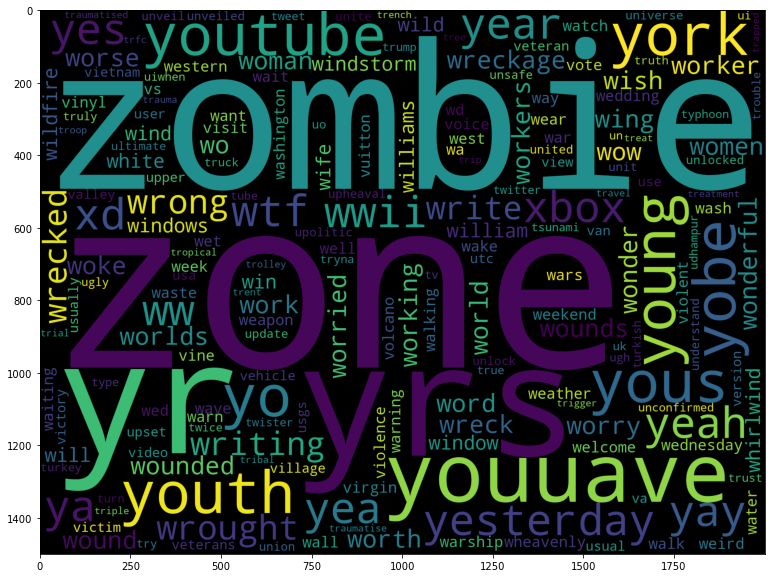

In [38]:
plt.figure(figsize= (15,10))
plt.imshow(wordcloud)

In [51]:
disasters = removed_na.loc[removed_na.target == 1]
non_disasters = removed_na.loc[removed_na.target == 0]
d_vect = CountVectorizer()
non_d_vect = CountVectorizer()
d_vect.fit_transform(disasters.text)
non_d_vect.fit_transform(non_disasters.text)

d_cloud=WordCloud(width = 2000, height = 1500).generate_from_frequencies(d_vect.vocabulary_)
non_d_cloud=WordCloud(width = 2000, height = 1500).generate_from_frequencies(non_d_vect.vocabulary_)

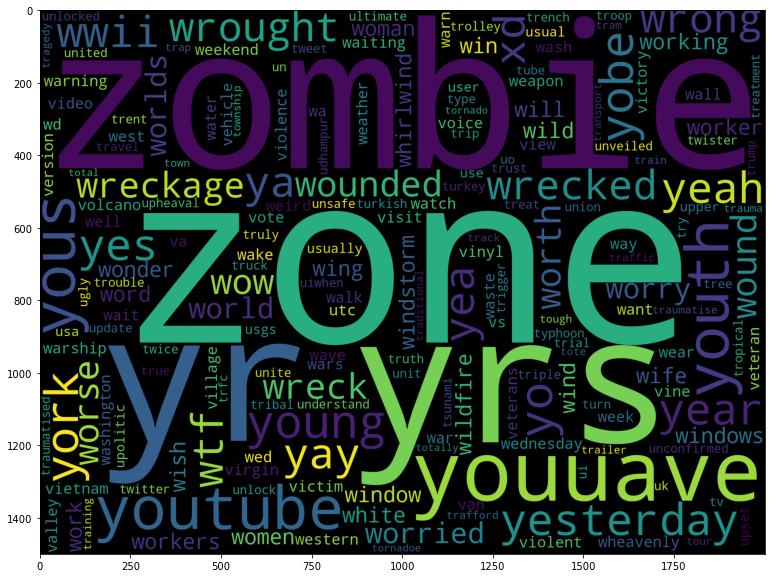

In [52]:
plt.figure(figsize= (15,10))
plt.imshow(d_cloud)

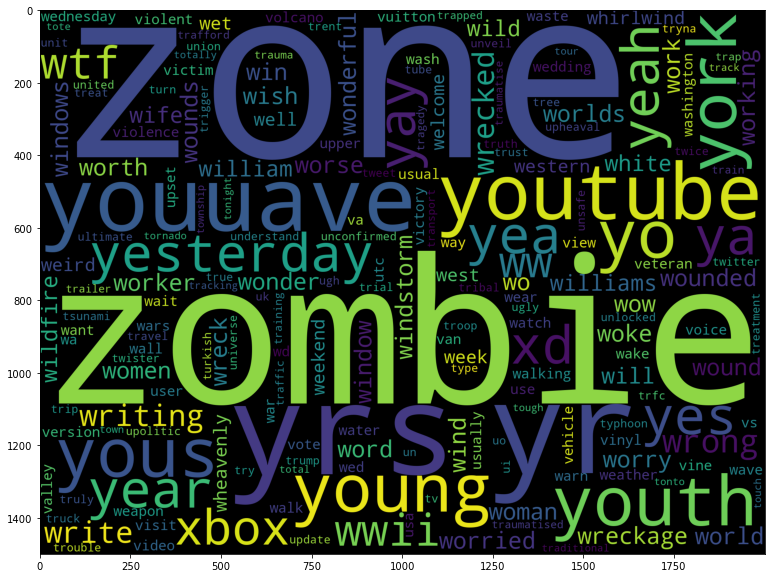

In [53]:
plt.figure(figsize= (15,10))
plt.imshow(non_d_cloud)

In [90]:
positives = sorted(d_vect.vocabulary_.items(), key=lambda x:x[1], reverse = True)
negatives = sorted(non_d_vect.vocabulary_.items(), key=lambda x:x[1], reverse = True)

In [93]:
positives = pd.DataFrame(d_vect.vocabulary_.items())

In [102]:
negatives = pd.DataFrame(non_d_vect.vocabulary_.items())
negatives.columns = ['word','count']

In [95]:
positives.columns = ['word','count']

In [96]:
positives

,word,count
0,reason,1314
1,forest,619
2,fire,595
3,near,1086
4,la,869
...,...,...
1867,vinyl,1774
1868,emotional,502
1869,conclusively,331
1870,wrecked,1847


In [97]:
positives.sort_values(by='count', ascending = False,inplace=True)

In [98]:
import seaborn as sns

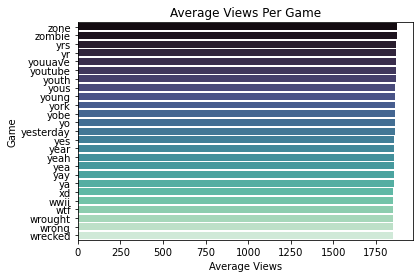

In [101]:
ax = sns.barplot(y=positives['word'][:25],x=positives['count'][:25],palette='mako')
ax.set_title('Average Views Per Game')
ax.set_xlabel('Average Views')
ax.set_ylabel('Game')
plt.show()

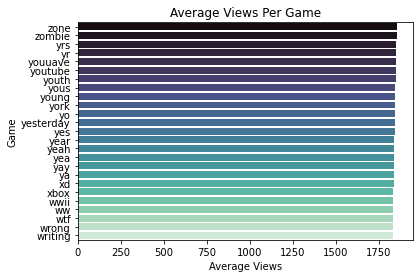

In [103]:
negatives.sort_values(by='count', ascending = False,inplace=True)
ax = sns.barplot(y=negatives['word'][:25],x=negatives['count'][:25],palette='mako')
ax.set_title('Average Views Per Game')
ax.set_xlabel('Average Views')
ax.set_ylabel('Game')
plt.show()

In [104]:
positives

,word,count
1330,zone,1871
279,zombie,1870
665,yrs,1869
656,yr,1868
1755,youuave,1867
...,...,...
117,able,4
61,ablaze,3
1134,abc,2
1421,abandon,1


In [63]:
df = pd.read_csv(r'nlp-getting-started/train.csv')

In [64]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [66]:
tweeter = TweetTokenizer()

In [74]:
df['tokenized'] = df['text'].apply(lambda x: tweeter.tokenize(x))

In [78]:
df[['tokenized','target']].head(20)

,tokenized,target
0,"[Our, Deeds, are, the, Reason, of, this, #eart...",1
1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]",1
2,"[All, residents, asked, to, ', shelter, in, pl...",1
3,"[13,000, people, receive, #wildfires, evacuati...",1
4,"[Just, got, sent, this, photo, from, Ruby, #Al...",1
5,"[#RockyFire, Update, =, >, California, Hwy, .,...",1
6,"[#flood, #disaster, Heavy, rain, causes, flash...",1
7,"[I'm, on, top, of, the, hill, and, I, can, see...",1
8,"[There's, an, emergency, evacuation, happening...",1
9,"[I'm, afraid, that, the, tornado, is, coming, ...",1


In [73]:
tweeter.tokenize(df['text'].iloc[7610])

['M1',
 '.',
 '94',
 '[',
 '01:04',
 'UTC',
 ']',
 '?',
 '5km',
 'S',
 'of',
 'Volcano',
 'Hawaii',
 '.',
 'http://t.co/zDtoyd8EbJ']

In [70]:
tweeter.tokenize(df['text'].iloc[7611])

['Police',
 'investigating',
 'after',
 'an',
 'e-bike',
 'collided',
 'with',
 'a',
 'car',
 'in',
 'Little',
 'Portugal',
 '.',
 'E-bike',
 'rider',
 'suffered',
 'serious',
 'non-life',
 'threatening',
 'injuries',
 '.']

In [69]:
tweeter.tokenize(df['text'].iloc[7612])

['The',
 'Latest',
 ':',
 'More',
 'Homes',
 'Razed',
 'by',
 'Northern',
 'California',
 'Wildfire',
 '-',
 'ABC',
 'News',
 'http://t.co/YmY4rSkQ3d']

In [6]:
def pull_hash(tokens):
    container = []
    for token in tokens:
        if "#" in token:
            container.append(token)
    return container

In [9]:
pull_hash(df.iloc[4]['text'].split())

['#Alaska', '#wildfires']

In [16]:
df['hashes'] = df['text'].apply(lambda x: pull_hash(x.split()))

In [17]:
df.head()

,id,keyword,location,text,target,hashes
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[#earthquake]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[#wildfires]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[#Alaska, #wildfires]"


In [21]:
df.hashes.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                               5852
[#hot, #prebreak, #best]                                           30
[#GBBO]                                                            10
[#news]                                                             9
[#Beyhive]                                                          8
                                                                 ... 
[#Phoenix, #ArizÛ_]                                                1
[#FREE, #Military, #Thriller, #Suspense, #Kindle, #amreading]       1
[#Desolation, #TheConspiracyTheory, #NewEP]                         1
[#alt, #electro, #rock, #comingsoon]                                1
[#breaking, #LA]                                                    1
Name: hashes, Length: 1388, dtype: int64

In [5]:
lemmatizer = WordNetLemmatizer()

In [12]:
lemmatizer.lemmatize("pianos",wordnet.NOUN)

'piano'

In [30]:
sentence = "My dads #likes to plays big pianos"

In [31]:
sentence.split()

['My', 'dads', '#likes', 'to', 'plays', 'big', 'pianos']

In [32]:
for word in sentence.split():
    print(lemmatizer.lemmatize(word,wordnet.NOUN))


My
dad
#likes
to
play
big
piano


In [17]:
from nltk import word_tokenize, pos_tag

In [27]:
pos_tag(['going','bought'])

[('going', 'VBG'), ('bought', 'VBD')]

In [56]:
df['keyword'].value_counts().tail(50)

destroyed                32
detonation               32
cyclone                  32
drown                    32
survive                  32
electrocute              32
apocalypse               32
eyewitness               32
blight                   32
mass%20murderer          32
forest%20fires           32
arson                    32
hijacking                32
hailstorm                32
trauma                   31
obliterate               31
devastated               31
hostage                  31
terrorist                31
obliterated              31
suicide%20bomber         31
crushed                  31
wild%20fires             31
catastrophic             30
mayhem                   30
avalanche                30
dead                     30
bioterrorism             30
survivors                30
annihilation             29
bombing                  29
obliteration             29
sirens                   29
snowstorm                29
desolate                 29
seismic             

In [55]:
df['location'].value_counts().tail(50)

Chicagoland                       1
New Delhi                         1
Minneapolis,MN,US                 1
Chicago, IL                       1
Quilmes , Arg                     1
Richmond, VA                      1
Romania                           1
???????? ?????????.               1
Queens New York                   1
Cuttack, Orissa                   1
Patra-Greece.                     1
All Around the World              1
Valle Del Sol                     1
New York NYC                      1
Hickville, USA                    1
Silesia, Poland                   1
Balikesir - Eskisehir             1
??????? ??????? ????????          1
Soul Somalia/Body Montreal        1
Yooooooo                          1
Jersey                            1
ÌÏT: 19.123127,72.825133          1
denver colorado                   1
Milton/Tallahassee                1
Paname City                       1
KÌ¦ln, Nordrhein-Westfalen        1
Broomfield, CO                    1
In my studio                

In [66]:
df[['keyword',"target"]].value_counts().head(50)

keyword              target
body%20bags          0         40
outbreak             1         39
wreckage             1         39
derailment           1         39
armageddon           0         37
typhoon              1         37
harm                 0         37
debris               1         37
oil%20spill          1         37
ruin                 0         36
deluge               0         36
wrecked              0         36
fear                 0         35
twister              0         35
explode              0         35
siren                0         35
panic                0         34
aftershock           0         34
screaming            0         34
blizzard             0         33
blaze                0         33
blazing              0         33
traumatised          0         33
crush                0         33
sinking              0         33
rescuers             1         32
suicide%20bomb       1         32
hellfire             0         32
suicide%20bombing   

In [8]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
df.loc[df['target'] == 0][:5]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [13]:
df.loc[df['target'] == 1][:-5]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1


In [25]:
### figure out how to remove ÛÓ
test = "Û"

In [26]:
ord(test)

219

In [20]:
ord("O")

79

In [21]:
ord("z")

122

In [22]:
ord("Z")

90

In [27]:
if ord(test) >122:
    print(True)

True


In [28]:
ord("a")

97

In [29]:
ord("A")

65

In [30]:
ord("!")

33

In [31]:
ord("#")

35

In [32]:
ord("?")

63

In [33]:
ord("5")

53

In [51]:
chr(60)

'<'